In [46]:
import math
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas_datareader as pdr
from datetime import datetime, timedelta

In [47]:
#Get the stock
ticker = 'PTON'
stock ="Peloton Interactive Inc"
# Time step n days, here we will use n  days historical data to predict next day closing
ts_points = 120
# train_data[0:60,0]  

today = datetime.today()
# start_date ='2016-01-01'
start_date = (today - timedelta(days=5*365) ).strftime('%Y-%m-%d')

# end_date   = today.strftime('%Y-%m-%d')
end_date = (today - timedelta(days=31) ).strftime('%Y-%m-%d')

stock_df = pdr.DataReader(ticker, data_source="yahoo", start=start_date, end=end_date)

In [48]:
# Date is an index but to be sure , let's sort
stock_df = stock_df.sort_index(ascending=True)
stock_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-26,27.980000,24.750000,27.170000,25.760000,47067700,25.760000
2019-09-27,26.170000,23.750000,26.170000,25.240000,15976000,25.240000
2019-09-30,25.850000,25.000000,25.260000,25.100000,4482900,25.100000
2019-10-01,25.170000,22.510000,25.000000,22.510000,8816100,22.510000
2019-10-02,23.180000,21.760000,22.250000,22.600000,9454700,22.600000
...,...,...,...,...,...,...
2021-09-20,104.129997,99.300003,101.400002,100.730003,5282300,100.730003
2021-09-21,103.930000,100.440002,101.250000,100.919998,3909900,100.919998
2021-09-22,99.980003,92.610001,99.510002,94.550003,17075000,94.550003


In [49]:
# check for nulls
stock_df.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [50]:
# Get shape
stock_df.shape

(504, 6)

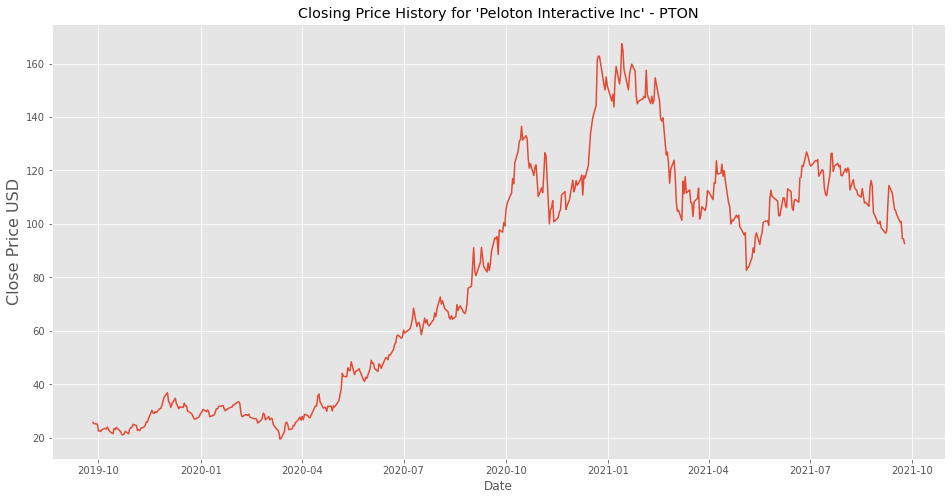

In [51]:
# Visualize closing price history
plt.figure(figsize=(16,8))
plt.title (f"Closing Price History for '{stock}' - {ticker}")
plt.plot(stock_df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD', fontsize=16)
plt.savefig('Saved_Models/Images/his_'+ticker+'.png')
plt.show()

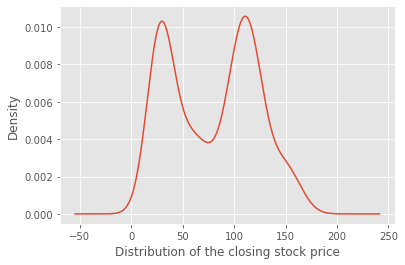

In [52]:
stock_df['Close'].plot.density()
plt.xlabel('Distribution of the closing stock price')
plt.savefig('Saved_Models/Images/den_'+ticker+'.png')
plt.show()

In [53]:
# DF with only close
TSdata_df = stock_df.filter(['Close'])
TSdata_df


,Close
Date,
2019-09-26,25.760000
2019-09-27,25.240000
2019-09-30,25.100000
2019-10-01,22.510000
2019-10-02,22.600000
...,...
2021-09-20,100.730003
2021-09-21,100.919998
2021-09-22,94.550003


In [54]:
TSdata_arr = TSdata_df.values # this creates an array of Close Price
TSdata_arr

array([[ 25.76000023],
       [ 25.23999977],
       [ 25.10000038],
       [ 22.51000023],
       [ 22.60000038],
       [ 22.32999992],
       [ 23.01000023],
       [ 23.51000023],
       [ 23.20999908],
       [ 24.        ],
       [ 23.13999939],
       [ 22.38999939],
       [ 21.46999931],
       [ 23.44499969],
       [ 23.03000069],
       [ 23.86000061],
       [ 23.52000046],
       [ 22.26000023],
       [ 21.15999985],
       [ 21.07999992],
       [ 21.34000015],
       [ 22.39999962],
       [ 21.45999908],
       [ 23.18000031],
       [ 23.71999931],
       [ 23.87000084],
       [ 24.98999977],
       [ 24.61000061],
       [ 22.73999977],
       [ 23.02000046],
       [ 22.62999916],
       [ 23.52000046],
       [ 24.04000092],
       [ 24.69000053],
       [ 25.97999954],
       [ 25.93000031],
       [ 27.22999954],
       [ 30.25      ],
       [ 29.23999977],
       [ 29.10000038],
       [ 29.79999924],
       [ 29.36000061],
       [ 30.87000084],
       [ 30

In [55]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np

# ADF Test
result = adfuller(TSdata_arr, autolag='AIC')

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -1.399188
p-value: 0.582665
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570
Failed to Reject Ho - Time Series is Non-Stationary


In [56]:
df2 = TSdata_df['Close'].diff().dropna().to_frame()
df2

,Close
Date,
2019-09-27,-0.520000
2019-09-30,-0.139999
2019-10-01,-2.590000
2019-10-02,0.090000
2019-10-03,-0.270000
...,...
2021-09-20,-2.689995
2021-09-21,0.189995
2021-09-22,-6.369995


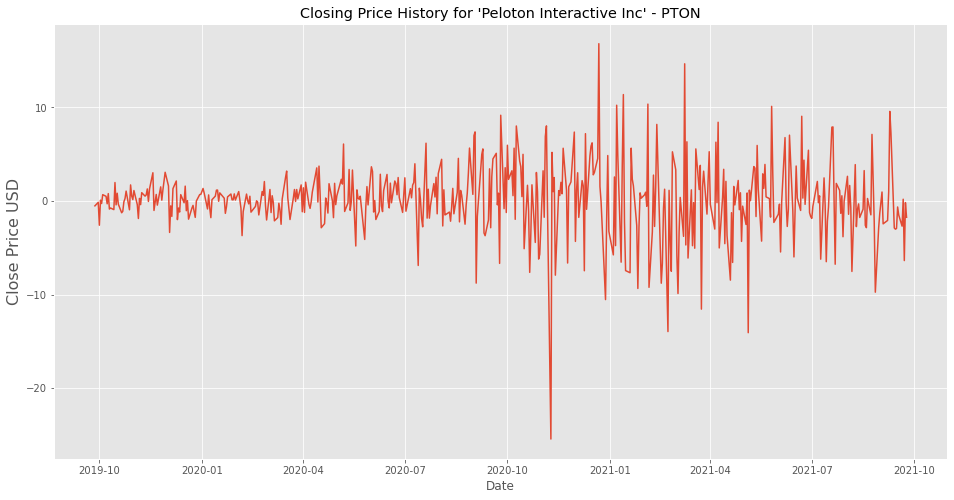

In [57]:
# Visualize closing price history
plt.figure(figsize=(16,8))
plt.title (f"Closing Price History for '{stock}' - {ticker}")
plt.plot(df2['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD', fontsize=16)
plt.savefig('Saved_Models/Images/diff_'+ticker+'.png')
plt.show()

In [58]:
# TSdata_arr = df2.filter(['Close']).values
# TSdata_arr

In [59]:
# Scale the Data
scaler = MinMaxScaler(feature_range =(0,1))
scaled_data = scaler.fit_transform(TSdata_arr)
# scaled_data

In [60]:
training_data_len = math.ceil(len(TSdata_arr) * 0.75)
training_data_len

378

In [61]:
# Created scaled training dataset
train_data = scaled_data[0:training_data_len]
train_data.shape

(378, 1)

In [62]:
# Split
X_train = []
y_train = []

for i in range(ts_points, len(train_data)):
    X_train.append(train_data[i-ts_points:i,0])
    y_train.append(train_data[i,0])
    # if i <= ts_points+3:
    #     print(X_train)
    #     print(y_train)
    #     print()


In [63]:
# convert X_train and y_train to numpy arrays for LSTM
X_train, y_train = np.array(X_train), np.array(y_train)

In [64]:
print (X_train.shape)
print (y_train.shape)

(258, 120)
(258,)


In [65]:
# LSTM network expects a 3D input (No_of_Samples, number of time steps, and number of features) no_of_features = 1 (Close)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(258, 120, 1)

In [66]:
training_data_len - ts_points

258

In [67]:
# hidden_nodes = int(2/3 * (X_train.shape[1] * 1))
# print(f"The number of hidden nodes is {hidden_nodes}.")

In [68]:
# LSTM MOdel
model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
# model.add(tf.keras.layers.LSTM(50, return_sequences=False))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.Dense(25))
# model.add(tf.keras.layers.Dense(1))
# model.summary()


In [69]:

# # BEST FOR PTON#
model.add(tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(tf.keras.layers.LSTM(50, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(25))
model.add(tf.keras.layers.Dense(1))
model.summary()

# #model.fit(X_train, y_train, batch_size=64, epochs=50

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 120, 50)           10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(optimizer='adam', loss='mean_squared_error')
# model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [71]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

batch_size=64

os.makedirs("chk_points/", exist_ok=True)
chkpoint_path="chk_points/weights.{epoch}.hdf5"

# Create chk points
chkpt_callback = ModelCheckpoint(filepath=chkpoint_path,
                              verbose=1,
                              save_weights_only=True,
                              save_freq="epoch",
                              period=5)

# chkpoint_path = "chk_points/cp-{epoch:04d}.ckpt"
# chkpt_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=chkpoint_path, 
#     verbose=1, 
#     save_weights_only=True,
#     save_freq=5*batch_size)                    

# model.save_weights(chkpoint_path.format(epoch=0))    


In [72]:
# training_data_len
# scaled_data

In [28]:
# model.fit(X_train, y_train, batch_size=batch_size, epochs=50, validation_split=0.43, callbacks=[chkpt_callback])
model.fit(X_train, y_train, batch_size=64 ,epochs=32)

Epoch 1/32
5/5 [==============================] - 4s 112ms/step - loss: 0.1747
Epoch 2/32
5/5 [==============================] - 0s 89ms/step - loss: 0.0275
Epoch 3/32
5/5 [==============================] - 0s 68ms/step - loss: 0.0242
Epoch 4/32
5/5 [==============================] - 0s 79ms/step - loss: 0.0155
Epoch 5/32
5/5 [==============================] - 0s 70ms/step - loss: 0.0206
Epoch 6/32
5/5 [==============================] - 0s 85ms/step - loss: 0.0125
Epoch 7/32
5/5 [==============================] - 0s 86ms/step - loss: 0.0159
Epoch 8/32
5/5 [==============================] - 0s 81ms/step - loss: 0.0096
Epoch 9/32
5/5 [==============================] - 0s 84ms/step - loss: 0.0096
Epoch 10/32
5/5 [==============================] - 0s 83ms/step - loss: 0.0084
Epoch 11/32
5/5 [==============================] - 0s 85ms/step - loss: 0.0088
Epoch 12/32
5/5 [==============================] - 0s 63ms/step - loss: 0.0091
Epoch 13/32
5/5 [==============================] - 0s 76ms/s

In [29]:
model.save('Saved_Models/Model_'+ticker+'.h5')

In [30]:
# test_data = scaled_data[training_data_len:]

# Bring in the last 'ts_points' (60 values) from training set so when X_test is used to predict , predictions have same shape as Y_test
# The for loop starts with 'ts_points' thatbmeans the resultant array will have 60 less rows
test_data = scaled_data[training_data_len-ts_points:]
# test_data[0:60,0]


In [31]:
X_test = []
y_test = TSdata_arr[training_data_len:]
for i in range(ts_points, len(test_data)):
    X_test.append(test_data[i-ts_points:i,0])


In [32]:
# convert the data to a numpy array to use it in LSTM MODEL
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],  X_test.shape[1], 1))

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
# Models predicted price for X_train
predictions_tr = model.predict(X_train)
predictions_tr = scaler.inverse_transform(predictions_tr)

y_train_tr =  scaler.inverse_transform(y_train.reshape(-1,1))
rmse_tr = math.sqrt(mean_squared_error(y_train_tr, predictions_tr))
rmse_tr

9.033311870808491

In [35]:
# Models predicted price for X_test
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

In [36]:
y_test.shape, predictions.shape

((126, 1), (126, 1))

In [37]:
# RMSE to check accuracy

rmse = math.sqrt(mean_squared_error(y_test, predictions))
rmse

10.263766806465746

In [38]:
# Plot
train = TSdata_df[:training_data_len]
actual = TSdata_df[training_data_len:]
actual['Predictions'] = predictions
actual

<ipython-input-38-bb86776ae978>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual['Predictions'] = predictions


,Close,Predictions
Date,,
2021-03-29,105.019997,113.875832
2021-03-30,107.169998,113.559006
2021-03-31,112.440002,113.358002
2021-04-01,112.089996,113.495926
2021-04-05,109.089996,113.852776
...,...,...
2021-09-20,100.730003,111.909233
2021-09-21,100.919998,111.918724
2021-09-22,94.550003,111.748154


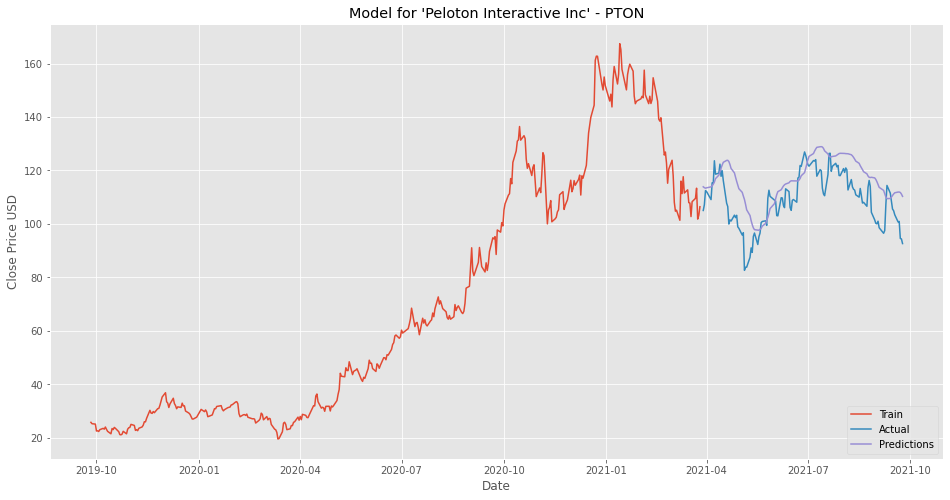

In [39]:
plt.figure(figsize=(16,8))
plt.title(f"Model for '{stock}' - {ticker}")
plt.xlabel("Date")
plt.ylabel("Close Price USD")
plt.plot(train['Close'])
plt.plot(actual[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.savefig('Saved_Models/Images/'+ticker+'.png')
plt.show()

# TEST

In [40]:
# for predictions add 100 extra days to make sure it has more than ts_points to make up for missing days (weekends and holidays)

fetch_days = ts_points + 100    

sd =  today - timedelta(days=fetch_days)
sd = sd.strftime('%Y-%m-%d')

ed = today.strftime('%Y-%m-%d')
ed

next_day = (today + timedelta(days=1) ).strftime('%Y-%m-%d')
# next_day

In [41]:
# get the quote
quote = pdr.DataReader(ticker, data_source="yahoo", start=sd, end=ed)
new_df = quote.filter(['Close'])
last_n_days = ts_points
last_n_days_arr = new_df[-last_n_days:].values 

In [42]:
last_n_days_scaled = scaler.transform(last_n_days_arr)
X_test = []
X_test.append(last_n_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))


In [43]:
##########################loading saved model ###############################
new_model = tf.keras.models.load_model('Saved_Models/Model_'+ticker+'.h5')

# Check its architecture
new_model.summary()
nmpred_price = new_model.predict(X_test)
nmpred_price = scaler.inverse_transform(nmpred_price)
nmpred_price = nmpred_price[0][0]
print(f"Predicted Closing price for '{stock}' on {next_day} is {nmpred_price:.4f}")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 120, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
Predicted Closing price for 'Peloton Interactive Inc' on 2021-10-26 is 96.0543


In [44]:
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price = pred_price[0][0]
print(f"Predicted Closing price for '{stock}' on {next_day} is {pred_price:.4f}")

Predicted Closing price for 'Peloton Interactive Inc' on 2021-10-26 is 96.0543


In [45]:
# verify
d1 = today - timedelta(days=5)
d1 = d1.strftime('%Y-%m-%d')

quote2 = pdr.DataReader(ticker, data_source="yahoo", start=d1)
quote2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-20,93.750000,89.779999,91.410004,90.650002,9689600,90.650002
2021-10-21,95.589996,90.349998,90.410004,94.830002,7021600,94.830002
2021-10-22,94.904999,92.180000,93.954002,93.830002,3920300,93.830002
2021-10-25,97.529900,93.290001,93.500000,96.599998,5713176,96.599998
